In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [303]:
data = pd.read_excel('현대제철.xlsx', header=1)
# data = pd.read_excel('대우건설.xlsx', header=1)
len(data.columns)
data.columns = ['일자','종가','전일대비','등락율','거래량','외국인','개인','기관종합','금융투자','투신(일반)','투신(사모)','은행','보험','기타금융','연기금등','국가지방','기타']
data.set_index('일자', inplace=True)
data.sort_index(inplace=True)
data = data.loc['2021-07-01':]

In [268]:
def cal_prop(segment):
    data['s_cumsum'] = data[segment].cumsum()
    data['s_bal'] = data['s_cumsum'] - data['s_cumsum'].min()
    return data['s_bal']/data['s_bal'].max()

data['s_prop'] = cal_prop('외국인')

def avg_price(segment):
    
    data['s_cumsum'] = data[segment].cumsum()
    data['s_bal'] = data['s_cumsum'] - data['s_cumsum'].min()    
    avg_price = data[['종가','s_bal']].prod(axis=1).cumsum()/data['s_bal'].cumsum()
    

    return avg_price

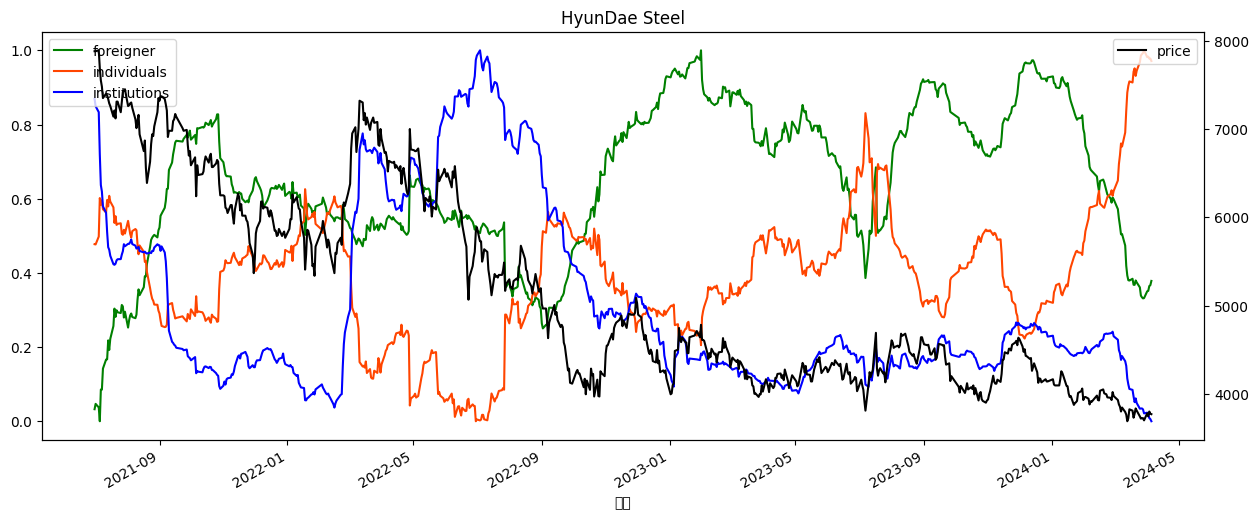

In [312]:
ax = cal_prop('외국인').plot(figsize=(15,6), color='green', label='foreigner')
ax = cal_prop('개인').plot(figsize=(15,6), color='orangered', label='individuals')
ax = cal_prop('기관종합').plot(figsize=(15,6), color='blue', label='institutions')
ax2 = ax.twinx()
ax2 = data['종가'].plot(figsize=(15,6), color='black', label='price')

# ax = avg_price('외국인').plot(figsize=(15,6), color='green', linestyle='--', alpha=0.5)
# ax = avg_price('개인').plot(figsize=(15,6), color='orangered', linestyle='--', alpha=0.5)
# ax = avg_price('기관종합').plot(figsize=(15,6), color='blue', linestyle='--', alpha=0.5)
# f_price = avg_price('외국인')[-1]
# i_price = avg_price('개인')[-1]
# s_price = avg_price('기관종합')[-1]
# ax2.axhline(f_price, color='green', linestyle='--')
# ax2.axhline(i_price, color='orangered', linestyle='--')
# ax2.axhline(s_price, color='blue', linestyle='--')
plt.title('HyunDae Steel')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

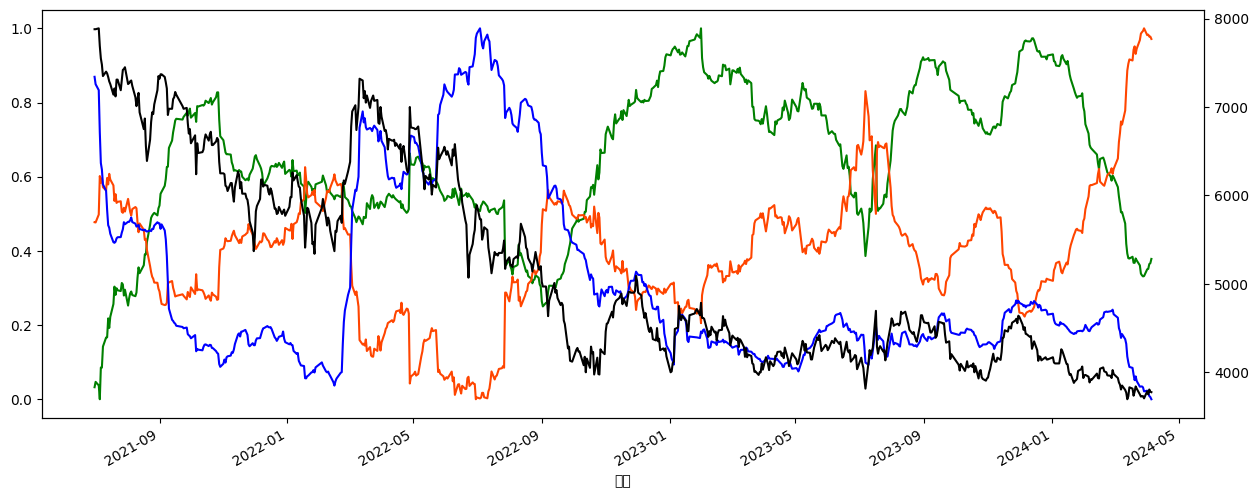

In [314]:
fig, ax = plt.subplots()
ax = cal_prop('외국인').plot(figsize=(15,6), color='green', label='foreigner')
ax = cal_prop('개인').plot(figsize=(15,6), color='orangered', label='individuals')
ax = cal_prop('기관종합').plot(figsize=(15,6), color='blue', label='institutions')
ax2 =ax.twinx()
ax2 = data['종가'].plot(figsize=(15,6), color='black', label='price')


In [311]:
# data = pd.read_excel('현대제철.xlsx', header=1)
data = pd.read_excel('대우건설.xlsx', header=1)
len(data.columns)
data.columns = ['일자','종가','전일대비','등락율','거래량','외국인','개인','기관종합','금융투자','투신(일반)','투신(사모)','은행','보험','기타금융','연기금등','국가지방','기타']
data.set_index('일자', inplace=True)
data.sort_index(inplace=True)
data = data.loc['2021-07-01':]

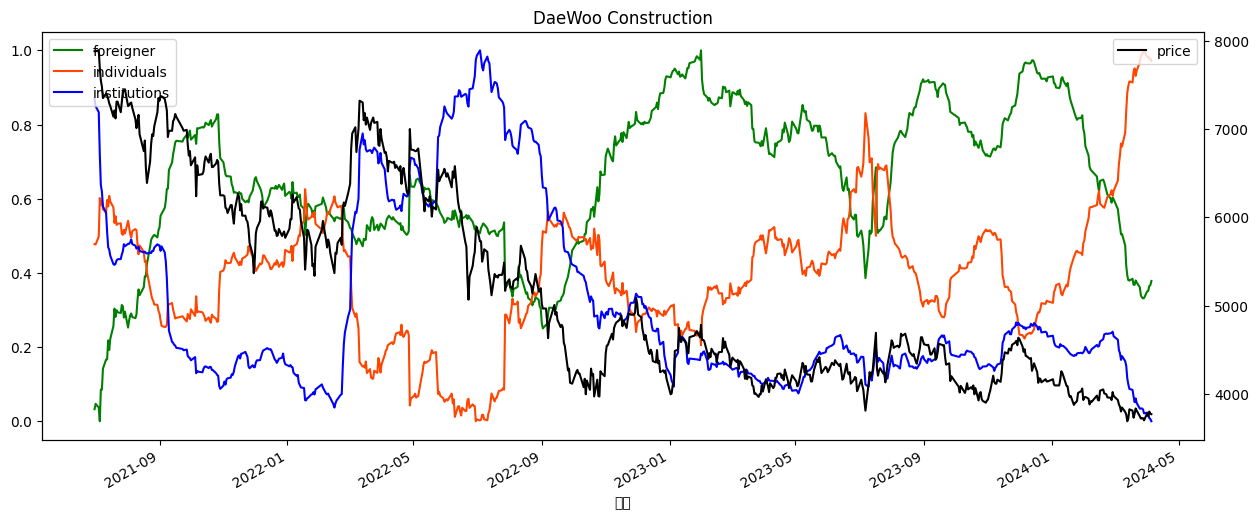

In [310]:
ax = cal_prop('외국인').plot(figsize=(15,6), color='green', label='foreigner')
ax = cal_prop('개인').plot(figsize=(15,6), color='orangered', label='individuals')
ax = cal_prop('기관종합').plot(figsize=(15,6), color='blue', label='institutions')
ax2 = ax.twinx()
ax2 = data['종가'].plot(figsize=(15,6), color='black', label='price')

# ax = avg_price('외국인').plot(figsize=(15,6), color='green', linestyle='--', alpha=0.5)
# ax = avg_price('개인').plot(figsize=(15,6), color='orangered', linestyle='--', alpha=0.5)
# ax = avg_price('기관종합').plot(figsize=(15,6), color='blue', linestyle='--', alpha=0.5)
# f_price = avg_price('외국인')[-1]
# i_price = avg_price('개인')[-1]
# s_price = avg_price('기관종합')[-1]
# ax2.axhline(f_price, color='green', linestyle='--')
# ax2.axhline(i_price, color='orangered', linestyle='--')
# ax2.axhline(s_price, color='blue', linestyle='--')
plt.title('DaeWoo Construction')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [289]:
# 주가선도 세력
print(f"{data['외국인'].cumsum().max():,.0f}   {data['개인'].cumsum().max():,.0f}   {data['기관종합'].cumsum().max():,.0f}")

879,809   33,054,665   12,500,865


In [290]:
print(f"{data['외국인'].sum():,.0f}   {data['개인'].sum():,.0f}   {data['기관종합'].sum():,.0f}")

-13,595,394   32,493,994   -17,239,657


<Axes: xlabel='일자'>

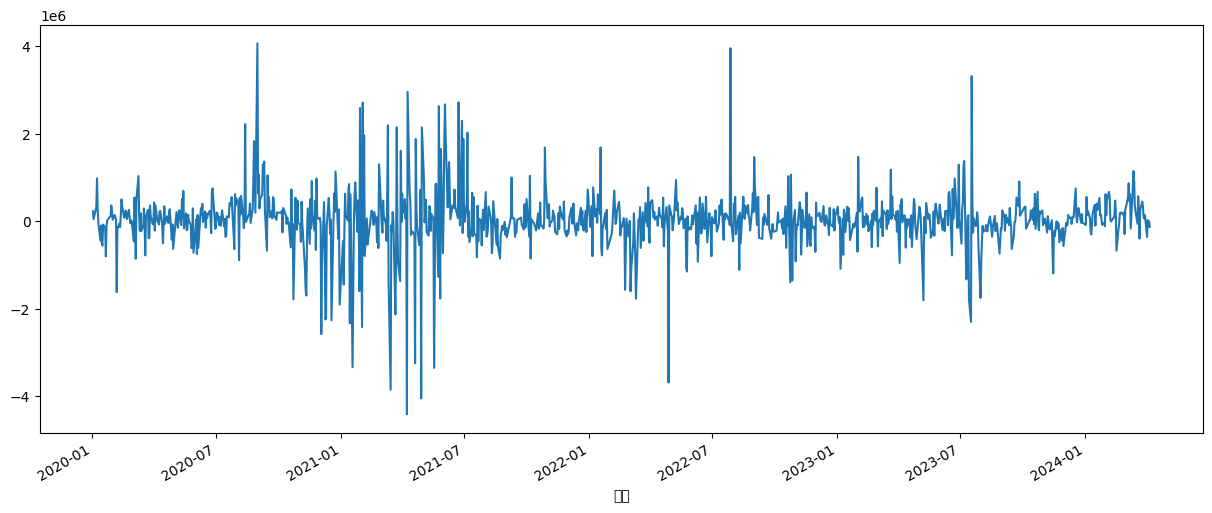

In [293]:
data['개인'].plot(figsize=(15,6))

In [281]:
def cal(segment):
    return (data[segment].cumsum() - data[segment].cumsum().min()).max()

print(f"{cal('외국인'):,.0f}   {cal('개인'):,.0f}   {cal('기관종합'):,.0f}")

20,035,895   32,198,912   29,740,522


In [225]:
import numpy as np
mdl = pd.DataFrame()
mdl['foreigners'] = cal_prop('외국인')
mdl['individuals'] = cal_prop('개인')
mdl['institutions'] = cal_prop('기관종합')
mdl['price'] = data['종가']

# mdl['x1'] =  mdl['foreigners'] - mdl['foreigners'].shif
# y = np.log(data['종가']) - np.log(data['종가'].shift(1))

In [230]:
mdl2 = (mdl - mdl.shift(1)).dropna()

In [232]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y = mdl2['price']
X = mdl2['individuals']

X = sm.add_constant(X)

est = sm.OLS(y, X).fit() 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     1111.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          8.98e-161
Time:                        00:32:10   Log-Likelihood:                -7270.3
No. Observations:                 929   AIC:                         1.454e+04
Df Residuals:                     927   BIC:                         1.455e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.4790     19.918     -0.526      

<Axes: xlabel='일자'>

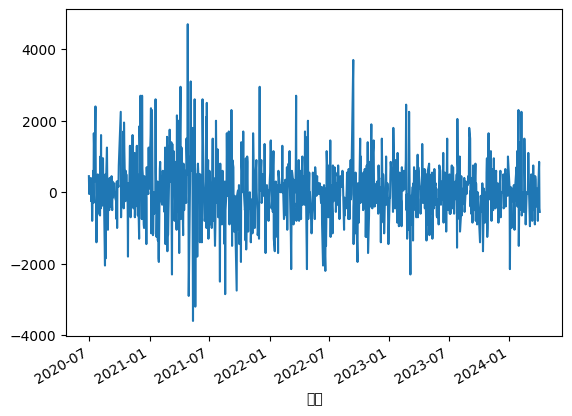

In [233]:
y.plot()

<Axes: xlabel='일자'>

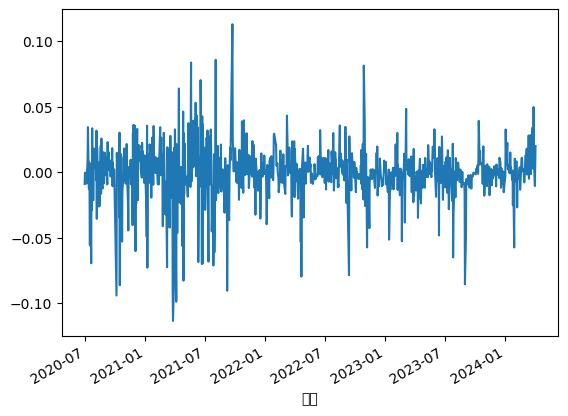

In [235]:
mdl2['individuals'].plot()